## IMPORT LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np

In [3]:
netflix_df = pd.read_csv('netflix_reviews.csv')

In [4]:
netflix_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0858b7bf-a9f1-4daf-b6c0-6daf1d8fe547,Ilekhue kelvin,Why are u guys doing autorenewal,1,0,8.141.1 build 13 51230,2024-12-20 15:50:52,8.141.1 build 13 51230
1,18c177f5-cd6f-4f76-b1a2-fdec4c23790a,Qali Ahmed,I love netflix but ihate that we must pay,2,0,NaN,2024-12-20 15:43:01,NaN
2,7bf0fef2-a0de-4e14-8804-cde42593c333,Sia Kobba,I absolutely love it. Download this app you wo...,4,0,8.103.0 build 8 50614,2024-12-20 15:40:04,8.103.0 build 8 50614
3,e6a81dd3-16da-40c1-b52a-fa7a01e014f1,Mustafa Thaaer,My tablet is Snapdragon 870 with 2k Screen and...,1,0,8.141.1 build 13 51230,2024-12-20 15:32:00,8.141.1 build 13 51230
4,c2e9c859-ffe8-4286-9099-38b6e9c009da,Sibusiso Sigam,Massive,5,0,8.141.1 build 13 51230,2024-12-20 15:31:15,8.141.1 build 13 51230


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122192 entries, 0 to 122191
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              122192 non-null  object
 1   userName              122190 non-null  object
 2   content               122188 non-null  object
 3   score                 122192 non-null  int64 
 4   thumbsUpCount         122192 non-null  int64 
 5   reviewCreatedVersion  103276 non-null  object
 6   at                    122192 non-null  object
 7   appVersion            103276 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.5+ MB


In [6]:
netflix_df.describe()

,score,thumbsUpCount
count,122192.000000,122192.000000
mean,2.828008,9.787875
std,1.711088,97.886833
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [7]:
netflix_df.describe(include='object')

,reviewId,userName,content,reviewCreatedVersion,at,appVersion
count,122192,122190,122188,103276,122192,103276
unique,121454,88321,119312,595,121850,595
top,ef9bf390-40f4-4c18-8726-fa2246c83a36,A Google user,Good,7.84.1 build 28 35243,2024-05-17 05:21:47,7.84.1 build 28 35243
freq,12,30212,582,1911,3,1911


Check duplicated rows

In [8]:
netflix_df[netflix_df.duplicated()].sort_values(by='reviewId').head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
13372,034aa51e-a591-4559-a5ec-648464d6e7cf,GABRIEL Rublica,Can it be put in Filipino language?🙃,5,0,8.114.0 build 19 50680,2024-05-17 09:43:22,8.114.0 build 19 50680
13459,034aa51e-a591-4559-a5ec-648464d6e7cf,GABRIEL Rublica,Can it be put in Filipino language?🙃,5,0,8.114.0 build 19 50680,2024-05-17 09:43:22,8.114.0 build 19 50680
13380,044865e0-0de1-4a2e-93a1-4ced464f496e,Valon,It's awesome but sometimes it might be a bit s...,4,0,8.114.0 build 19 50680,2024-05-17 08:32:40,8.114.0 build 19 50680
13467,044865e0-0de1-4a2e-93a1-4ced464f496e,Valon,It's awesome but sometimes it might be a bit s...,4,0,8.114.0 build 19 50680,2024-05-17 08:32:40,8.114.0 build 19 50680
13373,0726e2ab-5ca0-470d-b6c5-e685a37ecc6e,Mickael Paris,Good content and UI. I'll be cancelling my sub...,1,0,8.95.2 build 17 50558,2024-05-17 09:39:49,8.95.2 build 17 50558
13460,0726e2ab-5ca0-470d-b6c5-e685a37ecc6e,Mickael Paris,Good content and UI. I'll be cancelling my sub...,1,0,8.95.2 build 17 50558,2024-05-17 09:39:49,8.95.2 build 17 50558
14693,08141c38-e08a-4ae8-88ee-b8919f03d61a,Charles R Harris Jr,#BEWARE ☠️☠️☠️☠️☠️ Netflix has deteriorated to...,1,0,8.113.2 build 27 50674,2024-05-09 06:05:05,8.113.2 build 27 50674
14628,0993f287-c355-4239-b28f-2887eb872e11,Erina Iqbal,faltu,1,0,NaN,2024-05-09 13:44:04,NaN
13481,0aec0bc2-0cf3-4785-8b16-46c1c42e3fb5,Varsha,This household feature wifi doesn't even lets ...,1,0,8.103.0 build 8 50614,2024-05-17 06:17:24,8.103.0 build 8 50614
13510,0bd96dcb-5b57-45a3-b549-c527991bf835,Waliul Islam,Pp k nw.ñ,2,0,NaN,2024-05-17 03:08:52,NaN


In [9]:
# Remove duplicated rows
netflix_df = netflix_df.drop_duplicates()

In [10]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121905 entries, 0 to 122191
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121905 non-null  object
 1   userName              121903 non-null  object
 2   content               121901 non-null  object
 3   score                 121905 non-null  int64 
 4   thumbsUpCount         121905 non-null  int64 
 5   reviewCreatedVersion  103050 non-null  object
 6   at                    121905 non-null  object
 7   appVersion            103050 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.4+ MB


In [11]:
netflix_df.describe()

,score,thumbsUpCount
count,121905.000000,121905.000000
mean,2.827234,9.810803
std,1.710707,98.000851
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


## PERFORM DATA EXPLORATORY ANALYSIS (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_97955/2482395304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=netflix_df['score'], palette='Set1')


Text(0.5, 1.0, 'Distribution of rating scores')

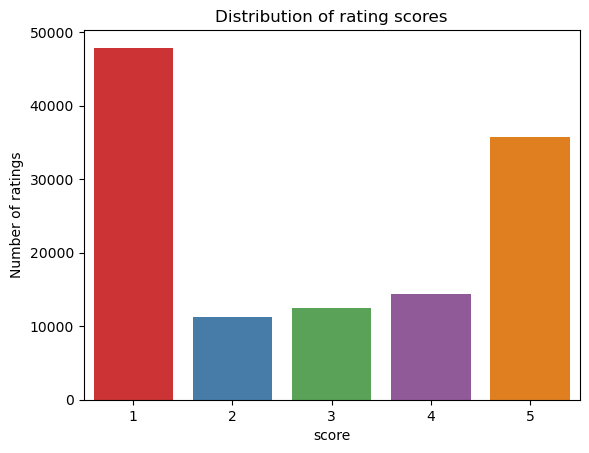

In [13]:
sns.countplot(x=netflix_df['score'], palette='Set1')
plt.ylabel('Number of ratings')
plt.title('Distribution of rating scores')

Text(0.5, 1.0, "Number of people that support the other's reviews")

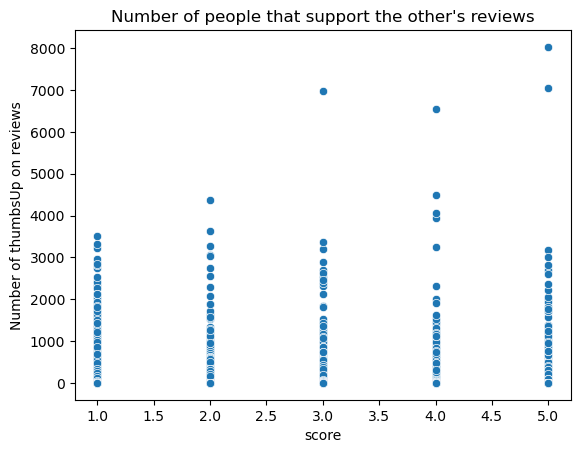

In [14]:
sns.scatterplot(x='score', y='thumbsUpCount', data=netflix_df)
plt.ylabel('Number of thumbsUp on reviews')
plt.title("Number of people that support the other's reviews")

In [15]:
#Create new column for content length

netflix_df['content'] = netflix_df['content'].fillna('')  # Replace NaN with empty string
netflix_df['length'] = netflix_df['content'].apply(len)

In [16]:
netflix_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,length
0,0858b7bf-a9f1-4daf-b6c0-6daf1d8fe547,Ilekhue kelvin,Why are u guys doing autorenewal,1,0,8.141.1 build 13 51230,2024-12-20 15:50:52,8.141.1 build 13 51230,32
1,18c177f5-cd6f-4f76-b1a2-fdec4c23790a,Qali Ahmed,I love netflix but ihate that we must pay,2,0,NaN,2024-12-20 15:43:01,NaN,41
2,7bf0fef2-a0de-4e14-8804-cde42593c333,Sia Kobba,I absolutely love it. Download this app you wo...,4,0,8.103.0 build 8 50614,2024-12-20 15:40:04,8.103.0 build 8 50614,60
3,e6a81dd3-16da-40c1-b52a-fa7a01e014f1,Mustafa Thaaer,My tablet is Snapdragon 870 with 2k Screen and...,1,0,8.141.1 build 13 51230,2024-12-20 15:32:00,8.141.1 build 13 51230,73
4,c2e9c859-ffe8-4286-9099-38b6e9c009da,Sibusiso Sigam,Massive,5,0,8.141.1 build 13 51230,2024-12-20 15:31:15,8.141.1 build 13 51230,7


<Axes: title={'center': "Disribution of the review's text length"}, ylabel='Frequency'>

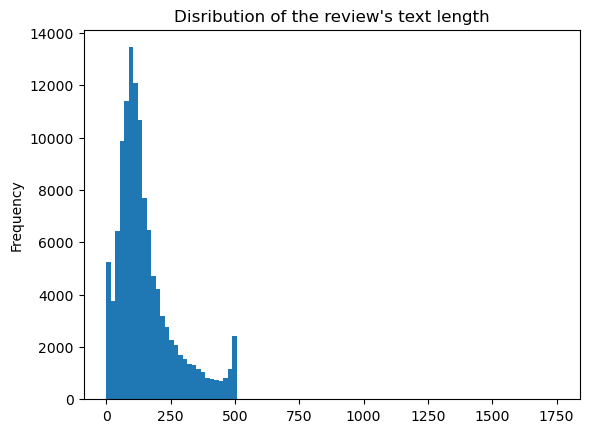

In [17]:
netflix_df['length'].plot(bins=100, kind='hist', title="Disribution of the review's text length")

## CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS FROM THE CONTENT 

In [18]:
# Create a new column for positive, negative reviews 
# Exclude neutral reviews (score = 3) from the dataset

netflix_df_model = netflix_df[netflix_df['score'] != 3]

def label_sentiment(scores):
    if scores in [1, 2]:
        return 0
    else:
        return 1

netflix_df_model['label'] = netflix_df_model['score'].apply(label_sentiment)

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_97955/931251622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_model['label'] = netflix_df_model['score'].apply(label_sentiment)


In [19]:
netflix_df_model.describe()

,score,thumbsUpCount,length,label
count,109413.000000,109413.000000,109413.000000,109413.000000
mean,2.807509,9.262519,149.641395,0.459041
std,1.804676,94.568944,112.298079,0.498322
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,77.000000,0.000000
50%,2.000000,0.000000,119.000000,0.000000
75%,5.000000,1.000000,187.000000,1.000000
max,5.000000,8032.000000,1650.000000,1.000000


In [20]:
positive = netflix_df_model[netflix_df_model['label'] == 1]
negative = netflix_df_model[netflix_df_model['label'] == 0]

In [21]:
# Import libraries
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aimeetienle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


def content_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [22]:
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def content_cleaning(message):
    # Remove punctuation
    message_without_punctuation = ''.join([char for char in message if char not in punctuation_set])
    
    # Split into words and filter out stopwords
    cleaned_message = [
        word for word in message_without_punctuation.split()
        if word.lower() not in stop_words
    ]
    
    return cleaned_message

In [23]:
positive_cleaned = positive['content'].apply(content_cleaning)
negative_cleaned = negative['content'].apply(content_cleaning)

In [24]:
positive_cleaned_toplot = [word for sublist in positive_cleaned for word in sublist]
positive_cleaned_toplot = " ".join(positive_cleaned_toplot)

In [25]:
positive_cleaned_toplot[:100]

'absolutely love Download app wont regrets Massive nice exelenet app Nice app good app best films Im '

In [26]:
negative_cleaned_toplot = [word for sublist in negative_cleaned for word in sublist]
negative_cleaned_toplot = " ".join(negative_cleaned_toplot)

In [27]:
negative_cleaned_toplot[:100]

'u guys autorenewal love netflix ihate must pay tablet Snapdragon 870 2k Screen yet Netflix plays SD '

## PLOT THE WORDCLOUD

In [28]:
from wordcloud import WordCloud

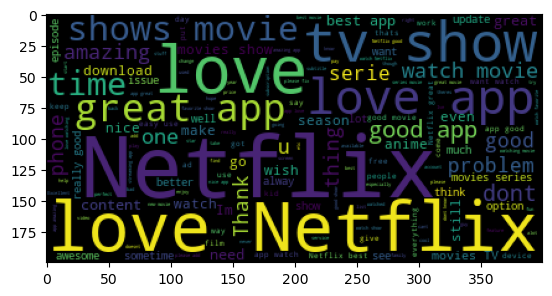

In [29]:
plt.imshow(WordCloud().generate(positive_cleaned_toplot))

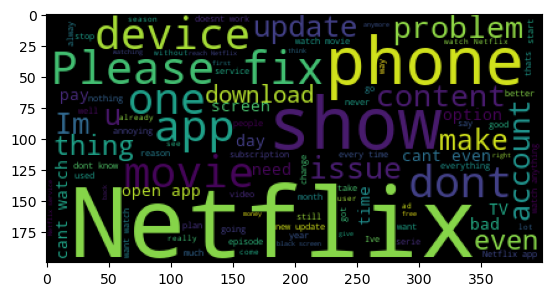

In [30]:
plt.imshow(WordCloud().generate(negative_cleaned_toplot))

## PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Define the cleaning pipeline
## Limits the number of features to 10,000 to reduce memory usage

vectorizer = CountVectorizer(max_features=10000, analyzer=content_cleaning, dtype=np.uint8)
netflix_countvectorizer = vectorizer.fit_transform(netflix_df_model['content'])

In [39]:
print(vectorizer.get_feature_names_out())

['0' '01' '010' ... '🥲' '🥺' '🥺🥺']


In [40]:
print(netflix_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
netflix_countvectorizer.shape

(109413, 10000)

In [42]:
X = pd.DataFrame(netflix_countvectorizer.toarray())

In [43]:
y = netflix_df_model['label']

## TRAIN AND EVALUATE MODELS

### PERFORM NAIVE BAYES CLASSIFIER MODEL

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [46]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

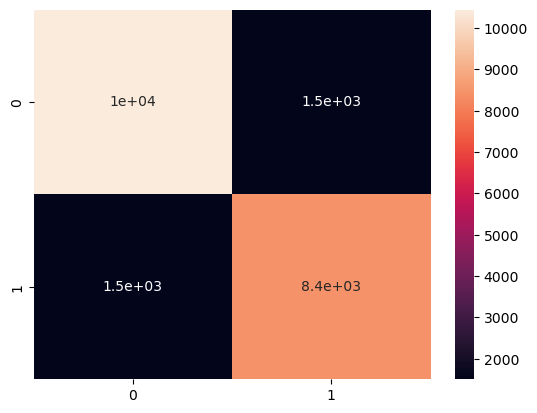

In [47]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11948
           1       0.85      0.85      0.85      9935

    accuracy                           0.86     21883
   macro avg       0.86      0.86      0.86     21883
weighted avg       0.86      0.86      0.86     21883



### PERFORM LOGISTIC REGRESSION MODEL

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11948
           1       0.87      0.87      0.87      9935

    accuracy                           0.88     21883
   macro avg       0.88      0.88      0.88     21883
weighted avg       0.88      0.88      0.88     21883



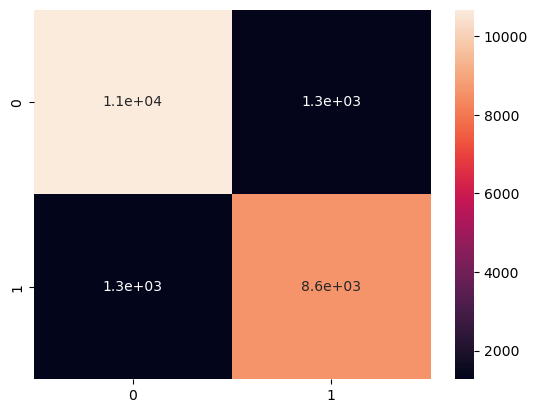

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

### PERFORM GRADIENT BOOST MODEL

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))